In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# X = [1, 2, 3, 4] <=> [x0, x1, x2, x3]
# Y = [2] <=> w_init + w_0*x0 + ... + w_3*x3

# Fake X data
x_data = np.random.random((10000, 2))

#Fake sample weights

sample_weights = np.array([3, 4]).reshape(2, )

# Fake y_data

y_data = np.matmul(x_data, sample_weights)



In [27]:
sample_weights

array([3, 4])

In [3]:
x_data[0]

array([0.61408761, 0.43080066])

In [4]:
y_data[0]

3.565465469482323

In [5]:
# Approximation y

y_data = np.add(y_data, np.random.uniform(-0.5, 0.5))

In [6]:
y_data[0]

3.287055762476798

In [7]:
y_data.shape

(10000,)

In [8]:
y_data = y_data.reshape(len(y_data), 1)

In [9]:
x_data


array([[0.61408761, 0.43080066],
       [0.6802563 , 0.13988386],
       [0.84904285, 0.58029271],
       ...,
       [0.17965207, 0.28548522],
       [0.52200576, 0.02560999],
       [0.16877872, 0.5911958 ]])

In [10]:
y_data

array([[3.28705576],
       [2.32189462],
       [4.58988968],
       ...,
       [1.40248739],
       [1.39004755],
       [2.59270963]])

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [12]:
x_train.shape

y_train.shape

(8000, 1)

In [13]:
n_dim = x_train.shape[1]
print(n_dim)

2


In [14]:
#placeholder
x = tf.placeholder(tf.float32, [None, n_dim])
y = tf.placeholder(tf.float32, [None, 1])

In [15]:
# trainable weights
w = tf.Variable(tf.ones([n_dim, 1]))

b = tf.Variable(np.random.randn(), dtype = tf.float32)

In [16]:
pred = tf.add(tf.matmul(x, w), b)

In [17]:
loss = tf.reduce_mean(tf.square(pred - y))

learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(loss)

In [18]:
init = tf.global_variables_initializer()

In [19]:
sess = tf.Session()

In [20]:
# Training
sess.run(init)
epochs = 2000

loss_history = []

for epoch in range(epochs):
    sess.run(optimizer, feed_dict ={x: x_train, y: y_train})
    
    test_loss = sess.run(loss, feed_dict={x: x_test, y: y_test})
    
    loss_history.append(test_loss)
    
    if epoch % 200 == 0:
        print("epoch {} Test loss = {}".format(epoch, test_loss))
        
print("training finished")

epoch 0 Test loss = 6.565343856811523
epoch 200 Test loss = 0.3113085925579071
epoch 400 Test loss = 0.19809918105602264
epoch 600 Test loss = 0.12639521062374115
epoch 800 Test loss = 0.08085501194000244
epoch 1000 Test loss = 0.05183257907629013
epoch 1200 Test loss = 0.033284544944763184
epoch 1400 Test loss = 0.021403446793556213
epoch 1600 Test loss = 0.013778764754533768
epoch 1800 Test loss = 0.00887818168848753
training finished


In [21]:
sess.run(w)

array([[2.8327298],
       [3.802934 ]], dtype=float32)

In [22]:
sess.run(b)

-0.08540146

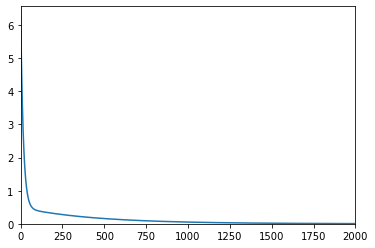

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_history)), loss_history)
plt.axis([0, epochs, 0, np.max(loss_history)])
plt.show()


In [24]:
pred_y = sess.run(pred, feed_dict = {
    x : [[2, 30],]
})

In [25]:
print(pred_y)

[[119.668076]]


In [28]:
2*2.8327298+3.802934*30

119.7534796